## all data

In [36]:
import pandas as pd
from pathlib import Path
import re
from tqdm import tqdm



results = []
results_dir = Path("../results/length_sampling_local_shuffle").resolve()
# target_files = [
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed1_window3/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed2_window3/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed3_window3/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed4_window3/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed5_window3/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed4_window4/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed1_window5/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed1_window6/samples.txt_entropy.txt",
#     "/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle/1M_samples_eos_min1_max20_LocalShuffle_seed1_window7/samples.txt_entropy.txt",
# ]

# 全てのentropy.txtファイルを検索
for entropy_file in tqdm(results_dir.glob('**/samples.txt_entropy.txt')):
# for entropy_file in target_files:
    # 実験名を取得（親ディレクトリの名前）
    experiment_name = Path(entropy_file).parent.name
    if "seed" in experiment_name and "window" in experiment_name:
        seed = int(re.search(r"seed(\d+)", experiment_name).group(1))
        window = int(re.search(r"window(\d+)", experiment_name).group(1))
        experiment_name = f"seed{seed}_window{window}"
    else:
        experiment_name = "Base"
        seed = None
        window = None


    # ファイルの内容を解析
    with open(entropy_file) as f:
        lines = f.readlines()

    # エントロピー値を抽出
    for line in lines:
        if 'gram:' in line:
            # 例: "3-gram: 4.5678 bits" から値を抽出
            match = re.match(r'(\d+)-gram: ([\d.]+) bits', line.strip())
            if match:
                n_gram = int(match.group(1))
                entropy = float(match.group(2))
                results.append({
                    'experiment_name': experiment_name,
                    'seed': seed,
                    'window': window,
                    'n_gram': n_gram,
                    'entropy': entropy
                })


26it [00:00, 3871.21it/s]


In [37]:
df = pd.DataFrame(results)

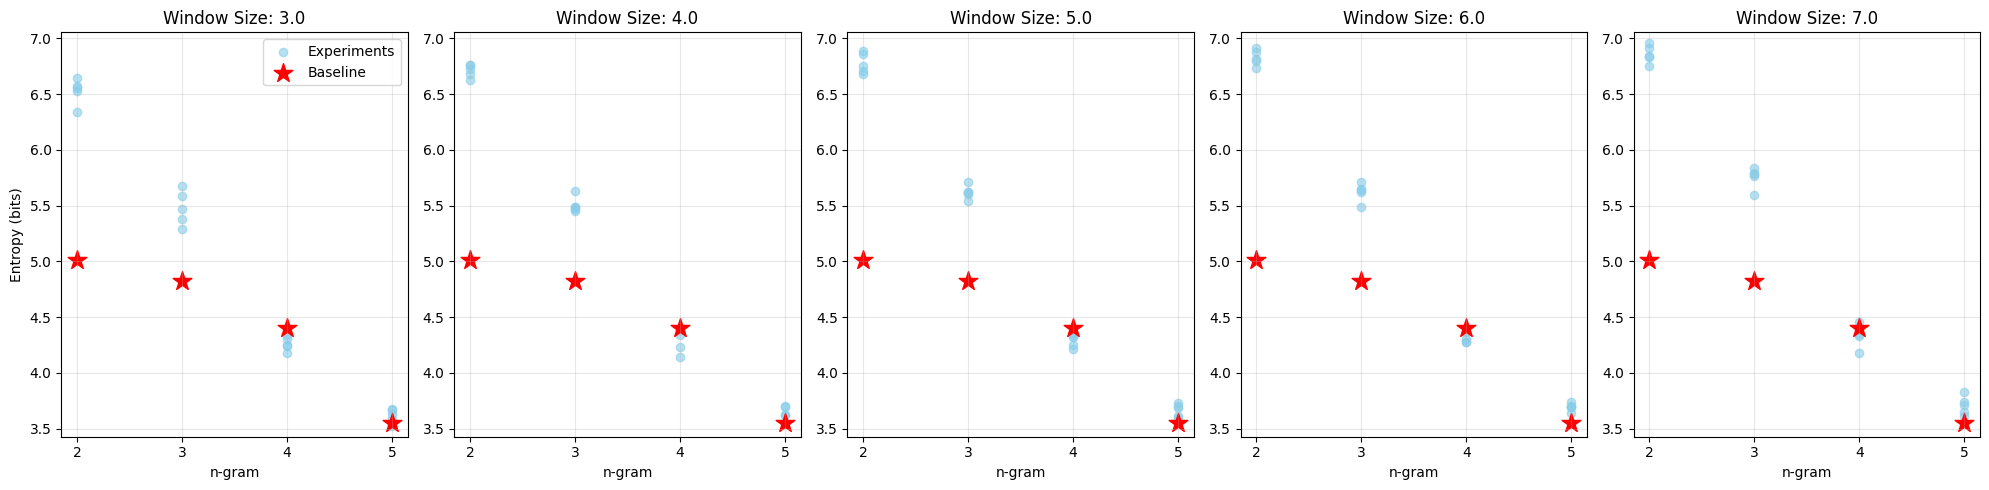

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# データ型を適切に変換
df['window'] = pd.to_numeric(df['window'])
df['n_gram'] = pd.to_numeric(df['n_gram'])
df['entropy'] = pd.to_numeric(df['entropy'])

# Baselineデータを除外
df_no_base = df[df['experiment_name'] != 'Base']
base_data = df[df['experiment_name'] == 'Base']

# ユニークなwindowサイズを取得
windows = sorted(df_no_base['window'].unique())
n_windows = len(windows)

# y軸の範囲を計算
y_min = df['entropy'].min() - 0.1  # 少し余裕を持たせる
y_max = df['entropy'].max() + 0.1

# サブプロットの作成
fig, axes = plt.subplots(1, n_windows, figsize=(4*n_windows, 5))

for i, window in enumerate(windows):
    # 各windowサイズのデータでscatter plot
    window_data = df_no_base[df_no_base['window'] == window]

    # 実験データをプロット
    axes[i].scatter(
        window_data['n_gram'],
        window_data['entropy'],
        color='skyblue',
        alpha=0.6,
        label='Experiments'
    )

    # Baselineデータをプロット
    axes[i].scatter(
        base_data['n_gram'],
        base_data['entropy'],
        color='red',
        marker='*',
        s=200,
        label='Baseline'
    )

    axes[i].set_title(f'Window Size: {window}')
    axes[i].set_xlabel('n-gram')
    axes[i].set_ylabel('Entropy (bits)' if i == 0 else '')

    # グリッドの追加
    axes[i].grid(True, alpha=0.3)

    # x軸の範囲を整数に制限
    axes[i].set_xticks(sorted(df['n_gram'].unique()))

    # y軸の範囲を統一
    axes[i].set_ylim(y_min, y_max)

    # 凡例を表示（最初のプロットのみ）
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

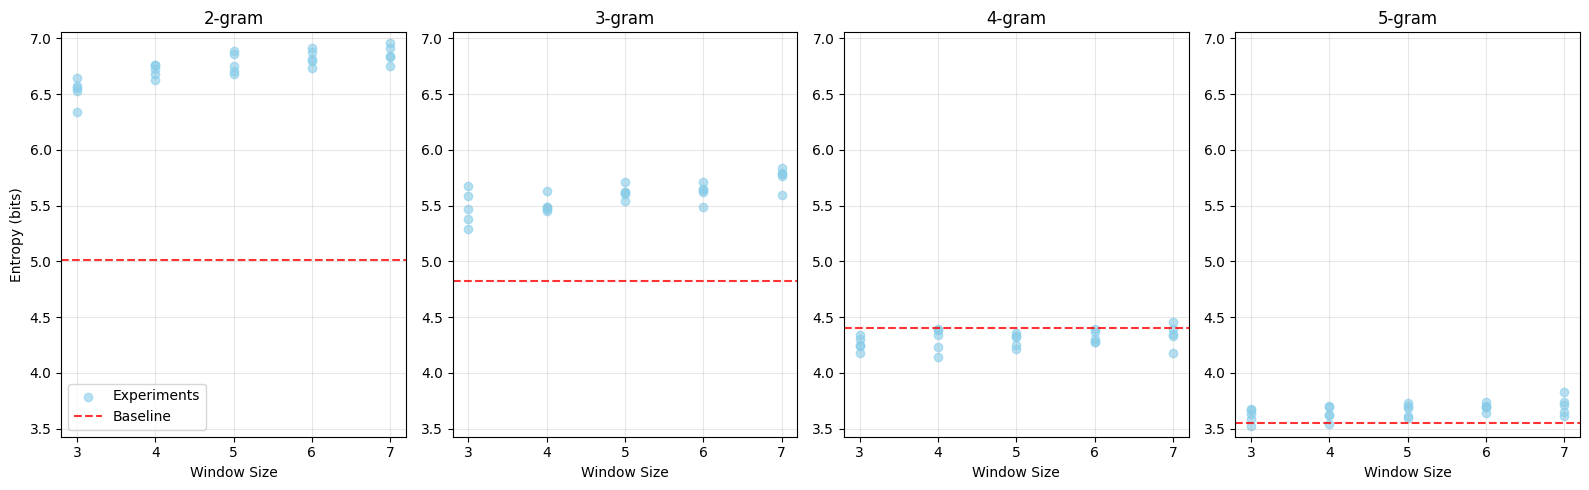

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# データ型を適切に変換（既に実行済みなら不要）
df['window'] = pd.to_numeric(df['window'])
df['n_gram'] = pd.to_numeric(df['n_gram'])
df['entropy'] = pd.to_numeric(df['entropy'])

# Baselineデータを除外
df_no_base = df[df['experiment_name'] != 'Base']
base_data = df[df['experiment_name'] == 'Base']

# ユニークなn-gramを取得
n_grams = sorted(df['n_gram'].unique())
n_plots = len(n_grams)

# y軸の範囲を計算
y_min = df['entropy'].min() - 0.1
y_max = df['entropy'].max() + 0.1

# サブプロットの作成
fig, axes = plt.subplots(1, n_plots, figsize=(4*n_plots, 5))

for i, n_gram in enumerate(n_grams):
    # 各n-gramのデータでscatter plot
    gram_data = df_no_base[df_no_base['n_gram'] == n_gram]

    # 実験データをプロット
    axes[i].scatter(
        gram_data['window'],
        gram_data['entropy'],
        color='skyblue',
        alpha=0.6,
        label='Experiments'
    )

    # Baselineデータをプロット
    base_value = base_data[base_data['n_gram'] == n_gram]['entropy'].values[0]
    axes[i].axhline(y=base_value, color='red', linestyle='--', alpha=0.8, label='Baseline')

    axes[i].set_title(f'{n_gram}-gram')
    axes[i].set_xlabel('Window Size')
    axes[i].set_ylabel('Entropy (bits)' if i == 0 else '')

    # グリッドの追加
    axes[i].grid(True, alpha=0.3)

    # x軸の範囲を整数に制限
    axes[i].set_xticks(sorted(df_no_base['window'].unique()))

    # y軸の範囲を統一
    axes[i].set_ylim(y_min, y_max)

    # 凡例を表示（最初のプロットのみ）
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

In [40]:
def get_seed(x):
    if "seed" in x:
        return int(re.search(r"seed(\d+)", x).group(1))
    else:
        return None

def get_window(x):
    if "window" in x:
        return int(re.search(r"window(\d+)", x).group(1))
    else:
        return None
model_result_df = pd.read_csv("/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle_results.csv")
model_result_df['seed'] = model_result_df['grammar_name'].apply(get_seed)
model_result_df['window'] = model_result_df['grammar_name'].apply(get_window)
merged_result_df = pd.merge(model_result_df, df[['seed', 'window', 'n_gram', 'entropy']].rename(columns={'entropy': 'local_entropy'}), on=['seed', 'window'], how='left')

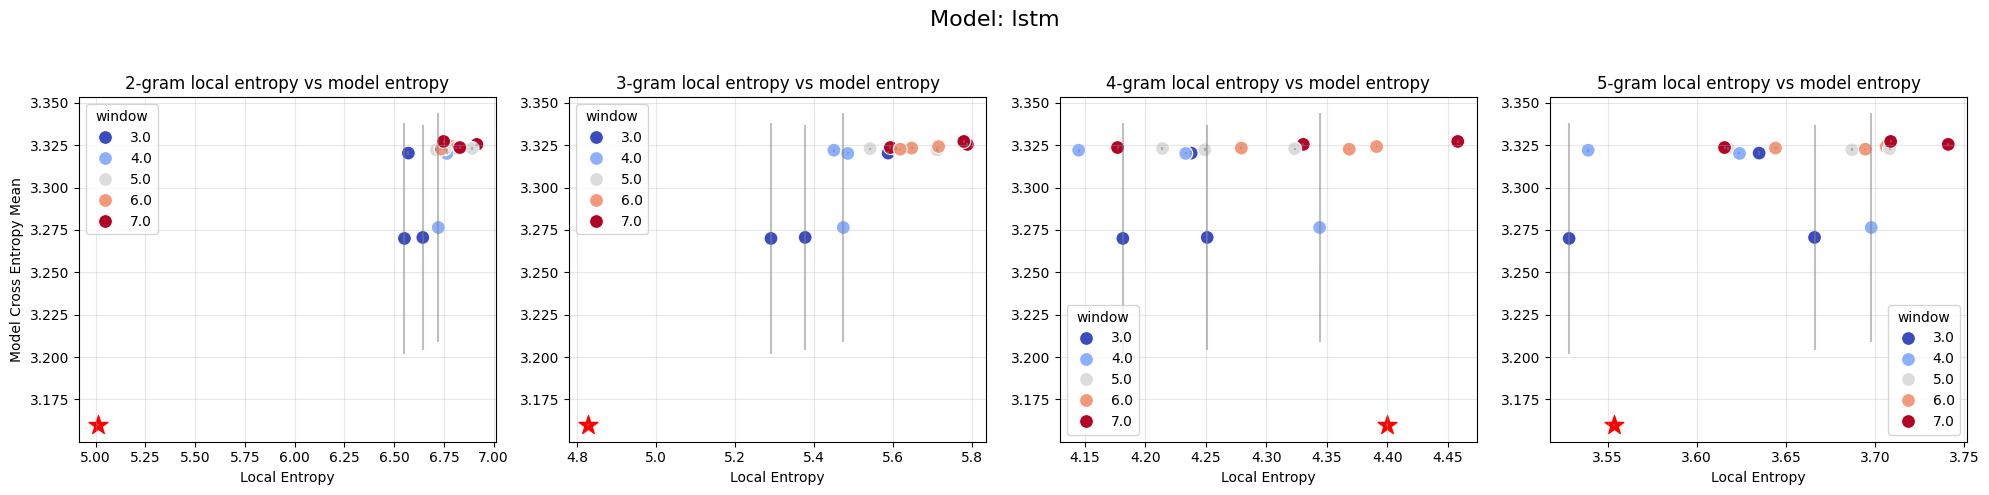

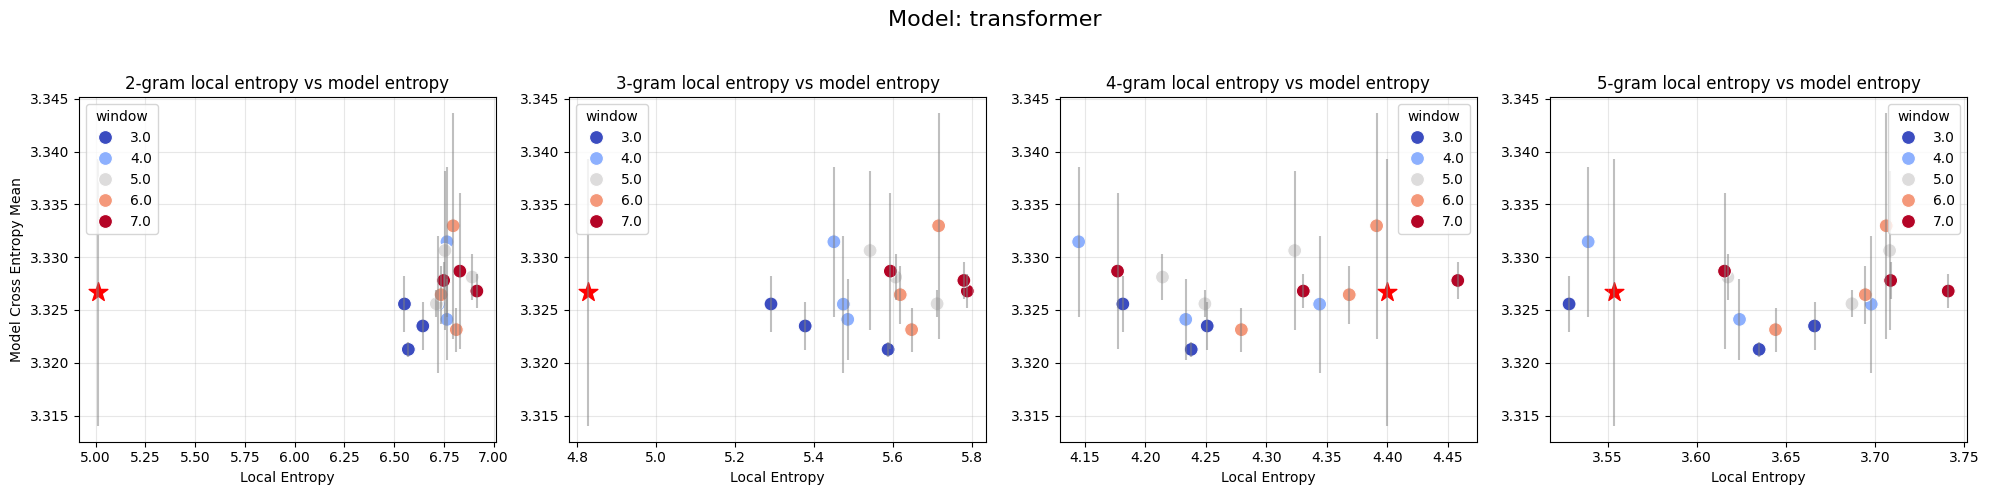

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# データ型を適切に変換
merged_result_df['local_entropy'] = pd.to_numeric(merged_result_df['local_entropy'])
merged_result_df['entropy_mean'] = pd.to_numeric(merged_result_df['entropy_mean'])
merged_result_df['entropy_std'] = pd.to_numeric(merged_result_df['entropy_std'])

# ユニークなn-gramを取得
n_grams = merged_result_df['n_gram'].unique()

for model_name in merged_result_df['model_name'].unique():
    # モデルごとのデータを取得
    model_data = merged_result_df[merged_result_df['model_name'] == model_name]

    # サブプロットの作成
    fig, axes = plt.subplots(1, len(n_grams), figsize=(5*len(n_grams), 5))

    for i, n_gram in enumerate(n_grams):
        # 各n-gramのデータを取得
        gram_data = model_data[model_data['n_gram'] == n_gram]

        # プロット
        sns.scatterplot(
            data=gram_data,
            x='local_entropy',
            y='entropy_mean',
            hue='window',
            ax=axes[i],
            palette='coolwarm',
            s=100
        )

        # エラーバーを追加
        for _, row in gram_data.iterrows():
            axes[i].errorbar(
                row['local_entropy'],
                row['entropy_mean'],
                yerr=row['entropy_std'],
                fmt='none',
                ecolor='gray',
                alpha=0.5
            )

        # Baseデータを強調
        base_data = gram_data[gram_data['grammar_name'] == 'Base']
        if not base_data.empty:
            axes[i].scatter(
                base_data['local_entropy'],
                base_data['entropy_mean'],
                color='red',
                marker='*',
                s=200,
                label='Base'
            )

        axes[i].set_title(f'{n_gram}-gram local entropy vs model entropy')
        axes[i].set_xlabel('Local Entropy')
        axes[i].set_ylabel('Model Cross Entropy Mean' if i == 0 else '')
        axes[i].grid(True, alpha=0.3)

    plt.suptitle(f'Model: {model_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## local entropy of test set

In [5]:
import pandas as pd
from pathlib import Path
import re
pd.set_option('display.max_rows', 500)

results = []
results_dir = Path("../data/fairseq_train/local_shuffle_10M_alpha07").resolve()

# 全てのentropy.csvファイルを検索
for entropy_file in results_dir.glob('**/entropy.csv'):
    experiment_name = Path(entropy_file).parent.name
    if "seed" in experiment_name and "window" in experiment_name:
        seed = int(re.search(r"seed(\d+)", experiment_name).group(1))
        window = int(re.search(r"window(\d+)", experiment_name).group(1))
        experiment_name = f"seed{seed}_window{window}"
    else:
        experiment_name = "Base"
        seed = None
        window = None

    # CSVファイルの内容を解析
    df = pd.read_csv(entropy_file)

    # 各n-gramのエントロピー値を抽出
    for n_gram in df['n_gram'].unique():
        n_gram_data = df[df['n_gram'] == n_gram]
        train_entropy = n_gram_data[n_gram_data['dataset'] == 'train']['entropy'].values[0]
        dev_entropy = n_gram_data[n_gram_data['dataset'] == 'dev']['entropy'].values[0]
        test_entropy = n_gram_data[n_gram_data['dataset'] == 'test']['entropy'].values[0]
        all_entropy = n_gram_data[n_gram_data['dataset'] == 'all']['entropy'].values[0]

        results.append({
            'experiment_name': experiment_name,
            'seed': seed,
            'window': window,
            'n_gram': n_gram,
            'train_entropy': train_entropy,
            'dev_entropy': dev_entropy,
            'test_entropy': test_entropy,
            'all_entropy': all_entropy
        })

# 結果をDataFrameに変換
results_df = pd.DataFrame(results)

In [6]:
df = pd.DataFrame(results).sort_values(by=['seed', 'window', 'n_gram'])
df

,experiment_name,seed,window,n_gram,train_entropy,dev_entropy,test_entropy,all_entropy
4,seed1_window3,1.0,3.0,2,4.190403,4.190342,4.190511,4.190408
5,seed1_window3,1.0,3.0,3,4.172942,4.172882,4.172867,4.172928
6,seed1_window3,1.0,3.0,4,4.091784,4.091798,4.091880,4.091795
7,seed1_window3,1.0,3.0,5,4.019842,4.020320,4.020488,4.019955
8,seed1_window4,1.0,4.0,2,4.194941,4.194903,4.195023,4.194945
9,seed1_window4,1.0,4.0,3,4.154584,4.154656,4.154539,4.154586
10,seed1_window4,1.0,4.0,4,4.131072,4.131287,4.131025,4.131088
11,seed1_window4,1.0,4.0,5,4.009589,4.009541,4.009386,4.009564
12,seed1_window5,1.0,5.0,2,4.192822,4.192757,4.192897,4.192823
13,seed1_window5,1.0,5.0,3,4.187551,4.187561,4.187644,4.187561


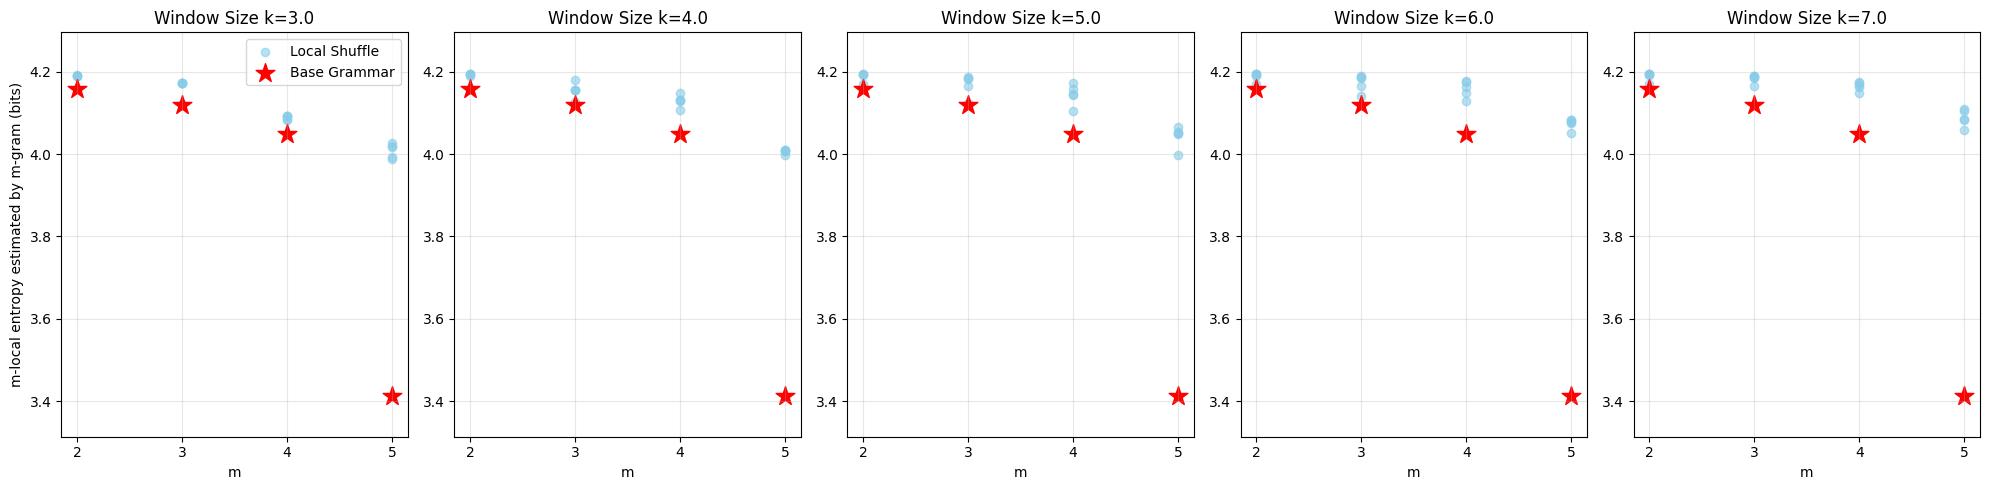

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

setname = "all"

# データ型を適切に変換
df['window'] = pd.to_numeric(df['window'])
df['n_gram'] = pd.to_numeric(df['n_gram'])
df[f'{setname}_entropy'] = pd.to_numeric(df[f'{setname}_entropy'])

# Baselineデータを除外
df_no_base = df[df['experiment_name'] != 'Base']
base_data = df[df['experiment_name'] == 'Base']

# ユニークなwindowサイズを取得
windows = sorted(df_no_base['window'].unique())
n_windows = len(windows)

# y軸の範囲を計算
y_min = df[f'{setname}_entropy'].min() - 0.1  # 少し余裕を持たせる
y_max = df[f'{setname}_entropy'].max() + 0.1

# サブプロットの作成
fig, axes = plt.subplots(1, n_windows, figsize=(4*n_windows, 5))

for i, window in enumerate(windows):
    # 各windowサイズのデータでscatter plot
    window_data = df_no_base[df_no_base['window'] == window]

    # 実験データをプロット
    axes[i].scatter(
        window_data['n_gram'],
        window_data[f'{setname}_entropy'],
        color='skyblue',
        alpha=0.6,
        label='Local Shuffle'
    )

    # Baselineデータをプロット
    axes[i].scatter(
        base_data['n_gram'],
        base_data[f'{setname}_entropy'],
        color='red',
        marker='*',
        s=200,
        label='Base Grammar'
    )

    axes[i].set_title(f'Window Size k={window}')
    axes[i].set_xlabel('m')
    axes[i].set_ylabel('m-local entropy estimated by m-gram (bits)' if i == 0 else '')

    # グリッドの追加
    axes[i].grid(True, alpha=0.3)

    # x軸の範囲を整数に制限
    axes[i].set_xticks(sorted(df_no_base['n_gram'].unique()))

    # y軸の範囲を統一
    axes[i].set_ylim(y_min, y_max)

    # 凡例を表示（最初のプロットのみ）
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

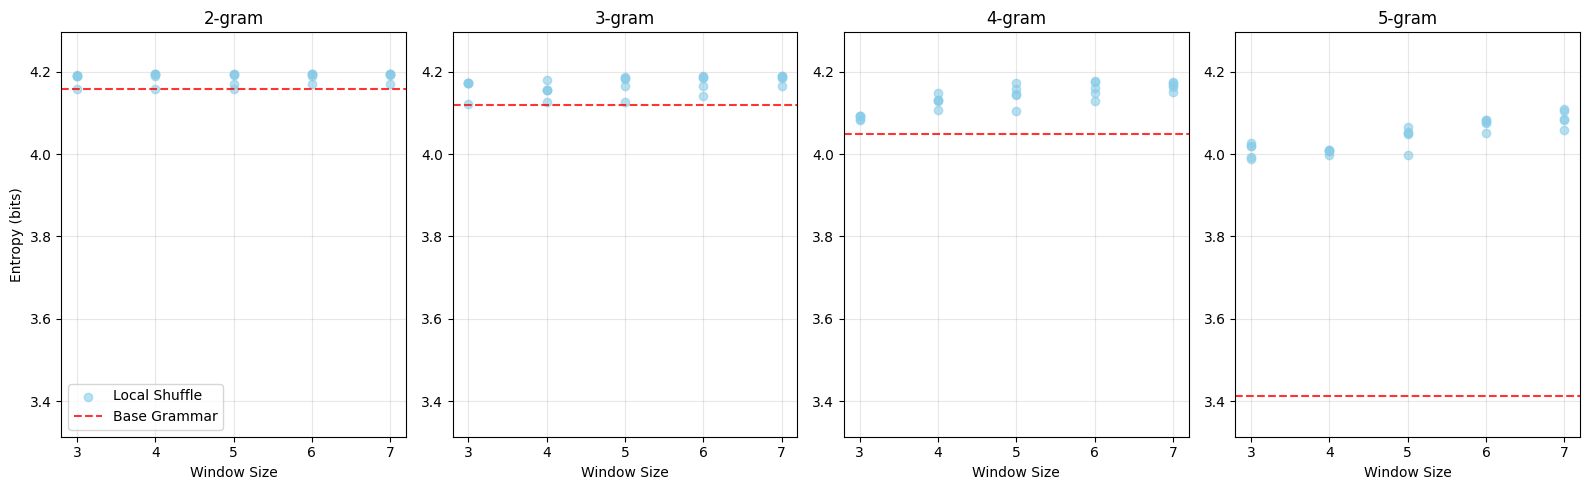

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

setname = 'test'

# データ型を適切に変換（既に実行済みなら不要）
df['window'] = pd.to_numeric(df['window'])
df['n_gram'] = pd.to_numeric(df['n_gram'])
df[f'{setname}_entropy'] = pd.to_numeric(df[f'{setname}_entropy'])

# Baselineデータを除外
df_no_base = df[df['experiment_name'] != 'Base']
base_data = df[df['experiment_name'] == 'Base']

# ユニークなn-gramを取得
n_grams = sorted(df['n_gram'].unique())
n_plots = len(n_grams)

# y軸の範囲を計算
y_min = df[f'{setname}_entropy'].min() - 0.1
y_max = df[f'{setname}_entropy'].max() + 0.1

# サブプロットの作成
fig, axes = plt.subplots(1, n_plots, figsize=(4*n_plots, 5))

for i, n_gram in enumerate(n_grams):
    # 各n-gramのデータでscatter plot
    gram_data = df_no_base[df_no_base['n_gram'] == n_gram]

    # 実験データをプロット
    axes[i].scatter(
        gram_data['window'],
        gram_data[f'{setname}_entropy'],
        color='skyblue',
        alpha=0.6,
        label='Local Shuffle'
    )

    # Baselineデータをプロット
    base_value = base_data[base_data['n_gram'] == n_gram][f'{setname}_entropy'].values[0]
    axes[i].axhline(y=base_value, color='red', linestyle='--', alpha=0.8, label='Base Grammar')

    axes[i].set_title(f'{n_gram}-gram')
    axes[i].set_xlabel('Window Size')
    axes[i].set_ylabel('Entropy (bits)' if i == 0 else '')

    # グリッドの追加
    axes[i].grid(True, alpha=0.3)

    # x軸の範囲を整数に制限
    axes[i].set_xticks(sorted(df_no_base['window'].unique()))

    # y軸の範囲を統一
    axes[i].set_ylim(y_min, y_max)

    # 凡例を表示（最初のプロットのみ）
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

In [90]:
def get_seed(x):
    if "seed" in x:
        return int(re.search(r"seed(\d+)", x).group(1))
    else:
        return None

def get_window(x):
    if "window" in x:
        return int(re.search(r"window(\d+)", x).group(1))
    else:
        return None

model_result_df = pd.read_csv("/home/agiats/Projects/impossible_inherent_entropy/results/length_sampling_local_shuffle_results.csv")
model_result_df['seed'] = model_result_df['grammar_name'].apply(get_seed)
model_result_df['window'] = model_result_df['grammar_name'].apply(get_window)

# すべてのエントロピーを含めるようにマージ
merged_result_df = pd.merge(
    model_result_df,
    df[['seed', 'window', 'n_gram', 'train_entropy', 'dev_entropy', 'test_entropy', 'all_entropy']].rename(columns={
        'train_entropy': 'train_local_entropy',
        'dev_entropy': 'dev_local_entropy',
        'test_entropy': 'test_local_entropy',
        'all_entropy': 'all_local_entropy'
    }),
    on=['seed', 'window'],
    how='left'
)

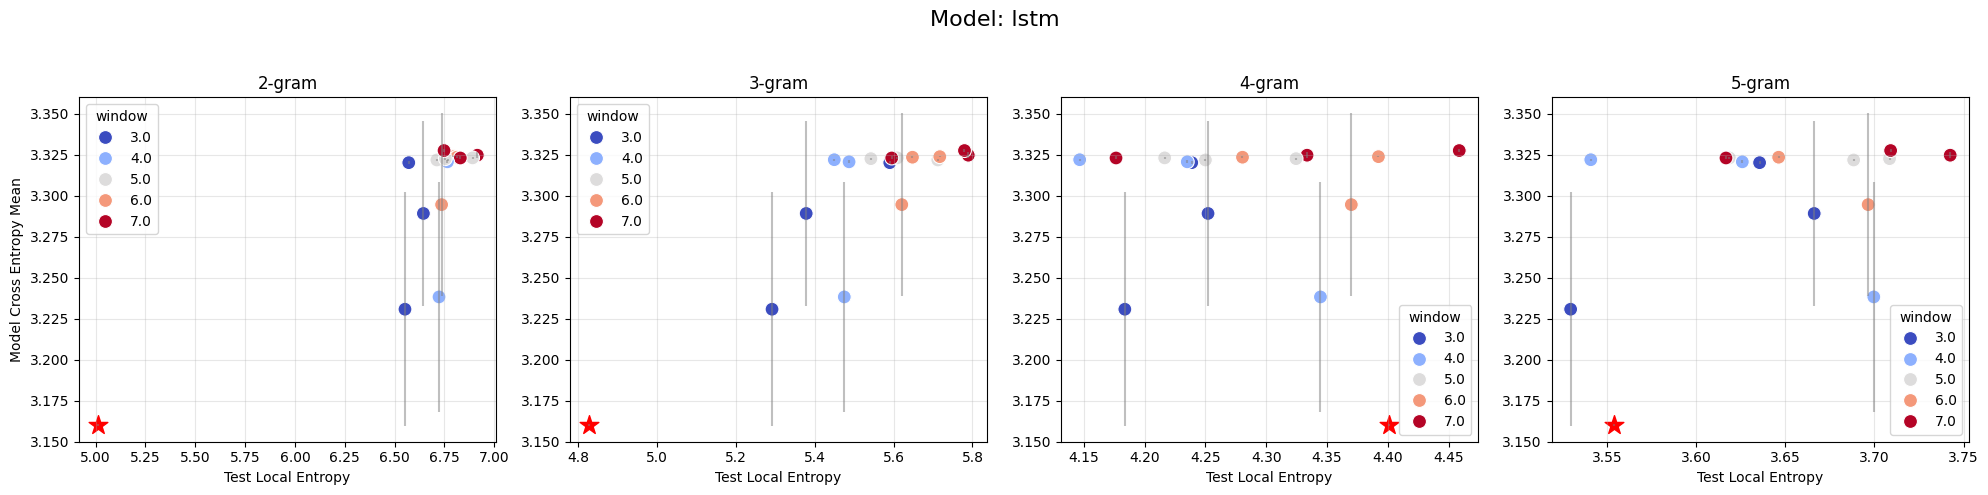

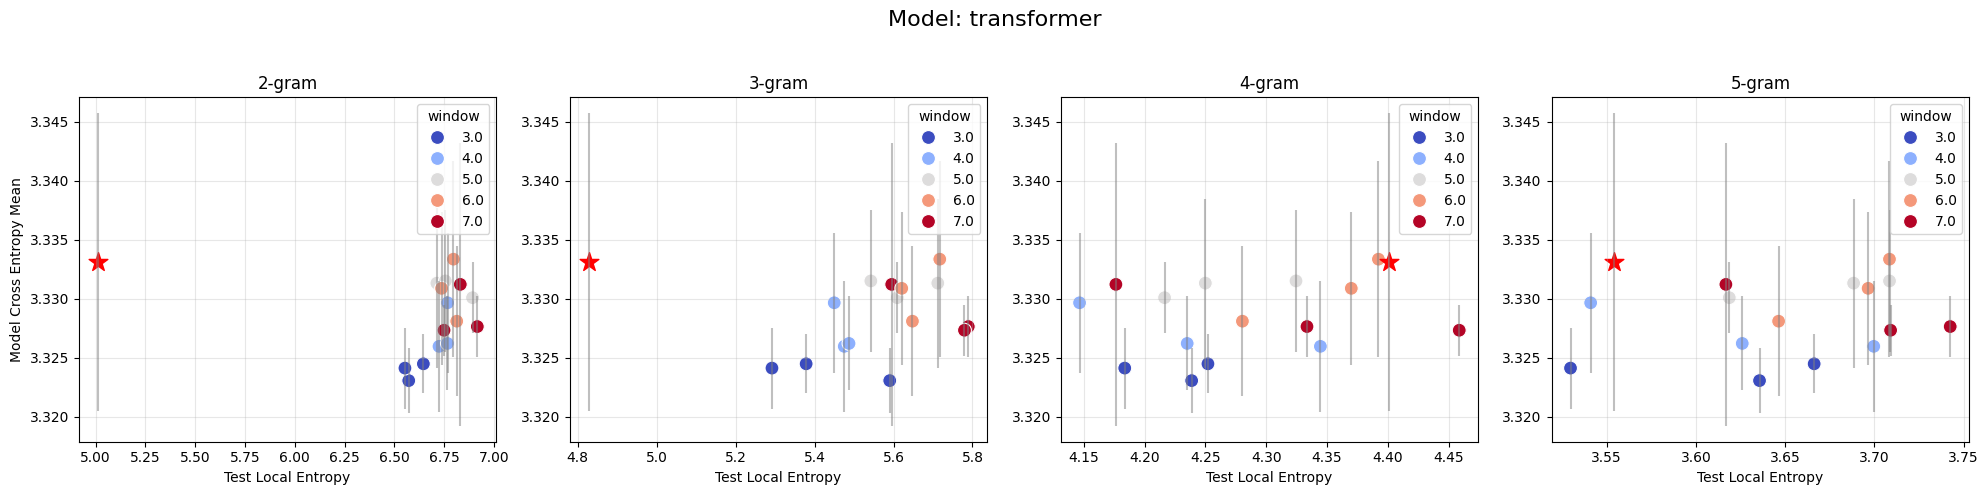

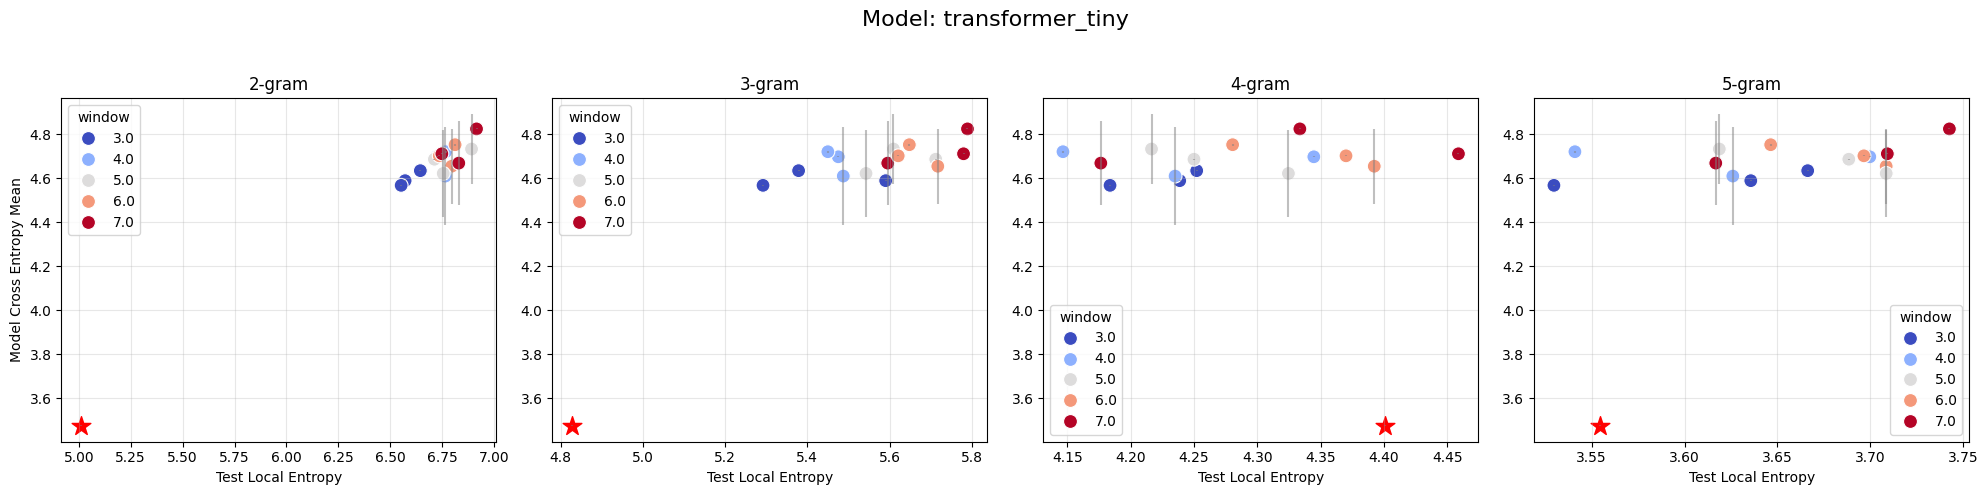

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# データ型を適切に変換
merged_result_df['entropy_mean'] = pd.to_numeric(merged_result_df['entropy_mean'])
merged_result_df['entropy_std'] = pd.to_numeric(merged_result_df['entropy_std'])

# ユニークなn-gramを取得
n_grams = merged_result_df['n_gram'].unique()

# プロットするエントロピーのセット名を指定
SETNAME = 'test'  # 'train', 'dev', 'test', 'all' など

for model_name in merged_result_df['model_name'].unique():
    # モデルごとのデータを取得
    model_data = merged_result_df[merged_result_df['model_name'] == model_name]

    # サブプロットの作成
    fig, axes = plt.subplots(1, len(n_grams), figsize=(5*len(n_grams), 5))

    for i, n_gram in enumerate(n_grams):
        # 各n-gramのデータを取得
        gram_data = model_data[model_data['n_gram'] == n_gram]

        # プロット
        sns.scatterplot(
            data=gram_data,
            x=f'{SETNAME}_local_entropy',
            y='entropy_mean',
            hue='window',
            ax=axes[i],
            palette='coolwarm',
            s=100
        )

        # エラーバーを追加
        for _, row in gram_data.iterrows():
            axes[i].errorbar(
                row[f'{SETNAME}_local_entropy'],
                row['entropy_mean'],
                yerr=row['entropy_std'],
                fmt='none',
                ecolor='gray',
                alpha=0.5
            )

        # Baseデータを強調
        base_data = gram_data[gram_data['grammar_name'] == 'Base']
        if not base_data.empty:
            axes[i].scatter(
                base_data[f'{SETNAME}_local_entropy'],
                base_data['entropy_mean'],
                color='red',
                marker='*',
                s=200,
                label='Base'
            )

        axes[i].set_title(f'{n_gram}-gram')
        axes[i].set_xlabel(f'{SETNAME.capitalize()} Local Entropy')
        axes[i].set_ylabel('Model Cross Entropy Mean' if i == 0 else '')
        axes[i].grid(True, alpha=0.3)

    plt.suptitle(f'Model: {model_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()